## Self-Study Colab Activity 4.5: Analyzing a Real-World Dataset

### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows.

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on their analysis.

-----

**Note that the solution code provided below is just an example solution. You are encouraged to manipulate the data in a different way than the one shown below and provide questions to generate different visualizations based on your interest.**


##### Data Description

```
1. Status of an existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g., real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes, no)
20. Foreign worker (yes, no)
```

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/dataset_31_credit-g.csv')

In [3]:
df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

### Import missing Python Libararies
This excise askes to explore visualization skills using `matplotlib`, `seaborn`, and `plotly`

In [9]:
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Check for duplicates
One can check for duplicates by comparing the shapes of the DataFrame before and after removing duplicates.

No duplicates are found.

In [5]:
print("Before removing duplicates:", df.shape)

Before removing duplicates: (1000, 21)


In [6]:
#remove duplicates
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

After removing duplicates: (1000, 21)


## Check Missing Values

Checking for missing values.

There are no missing values in the DataFrame.

In [7]:
missing_counts = df.isnull().sum().sort_values()
print(missing_counts)


checking_status           0
own_telephone             0
num_dependents            0
job                       0
existing_credits          0
housing                   0
other_payment_plans       0
age                       0
property_magnitude        0
foreign_worker            0
residence_since           0
personal_status           0
installment_commitment    0
employment                0
savings_status            0
credit_amount             0
purpose                   0
credit_history            0
duration                  0
other_parties             0
class                     0
dtype: int64


## Understand the Correlations among Numerical Features
Compute how numerical features correlated with class type `good` and `bad` separately.


## Findings

1. Higher credit amounts are indicative of favorable credit classifications.
2. A higher installment rate as a percentage of disposable income correlates with lower credit amounts and is often associated with a 'bad' credit classification.

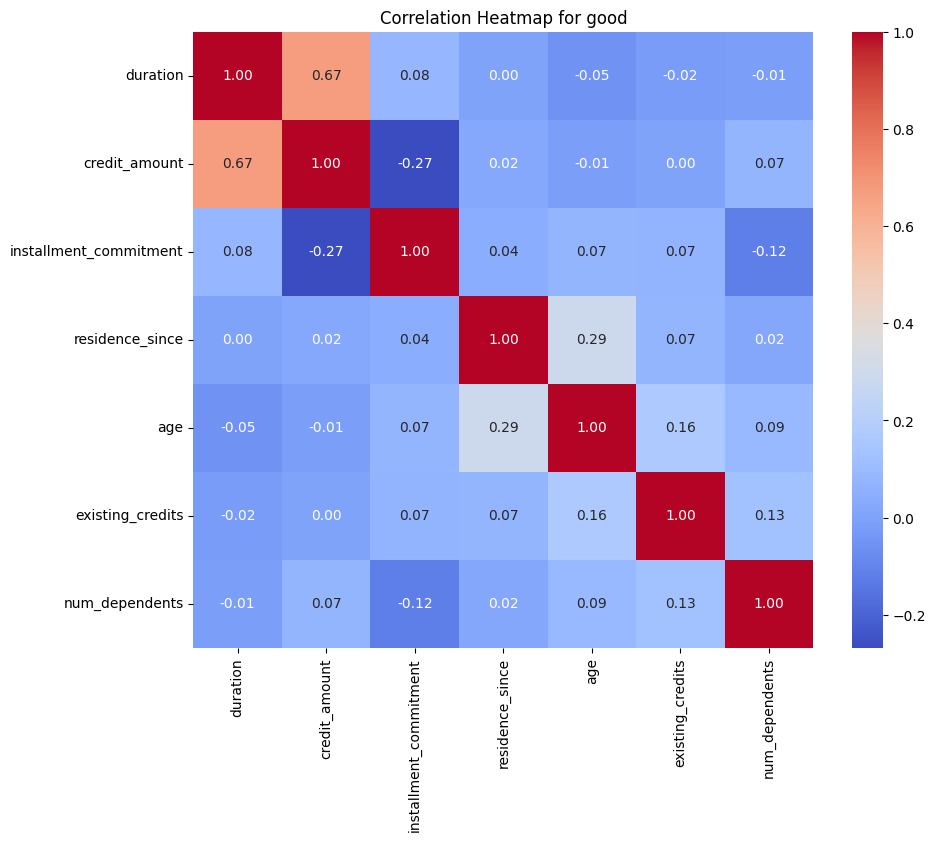

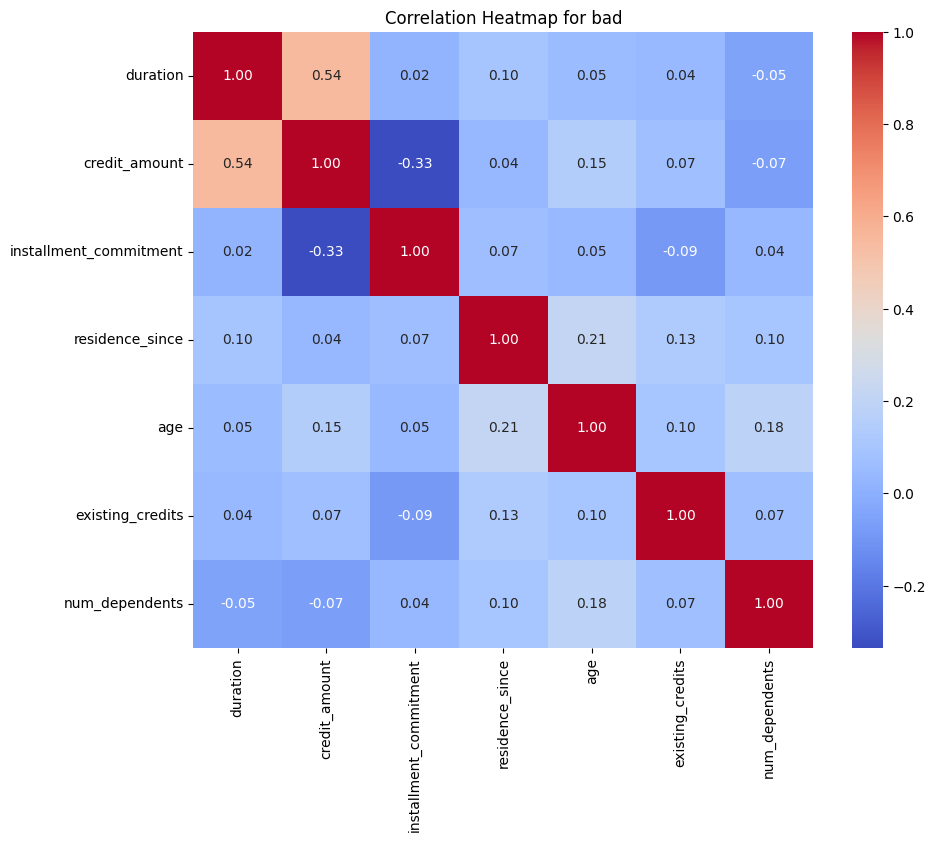

In [10]:
df.rename(columns={'class': 'credit_class'}, inplace=True)

classtypes = df['credit_class'].unique()

# Loop through each class to plot a heatmap of correlation matrix
for credit_class in classtypes:
    # Filter the DataFrame for the current class
    subset_df = df[df['credit_class'] == credit_class]
    numerical_subset_df = subset_df.select_dtypes(include=['int64', 'float64'])
    corr = numerical_subset_df.corr()

    plt.figure(figsize=(10, 8))  # Adjust the size as needed
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for {credit_class}')
    plt.show()



## Remove all leading and trailing apostrophes for String Objects.

In [11]:
for col in df.columns:
    # Check if the column is of object type
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip("'")
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit_class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


## Analyze and split the `personal_status` column using string function and create two new columns 'Sex' and "Marriage_Status"

In [12]:
print(df['personal_status'].value_counts())

personal_status
male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: count, dtype: int64


In [13]:
df[['sex', 'marriage_status']] = df['personal_status'].str.strip().str.split('[ /]+', n=1, expand=True)

df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,credit_class,sex,marriage_status
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,none,own,2,skilled,1,yes,yes,good,male,single
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,none,own,1,skilled,1,none,yes,bad,female,div/dep/mar
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,none,own,1,unskilled resident,2,none,yes,good,male,single
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,none,for free,1,skilled,2,none,yes,good,male,single
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,none,for free,2,skilled,2,none,yes,bad,male,single


## Replace the typo 'dep' to 'sep' for marriage_status.

Based on the value counts results, the values of `personal_status` equal to `male single` and `personal_status` equal to `female div/dep/mar` are the majority of the sample.

Therefore, it doesn't make sense to further to split `marriage_status` column. Additionally, we can not determine the break down female's marriage_status into more finer levels, say , `div`, `dep` or `mar`.


In [14]:
df['marriage_status'] = df['marriage_status'].str.replace('dep', 'sep', regex=False)

In [15]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # Adjust as necessary

for col in categorical_columns:
    if col != 'credit_class':  # Assuming 'credit_class' is also a categorical column
        contingency_table = pd.crosstab(index=df[col], columns=df['credit_class'])
        print(f"Contingency Table for {col}:\n", contingency_table)

Contingency Table for checking_status:
 credit_class     bad  good
checking_status           
0<=X<200         105   164
<0               135   139
>=200             14    49
no checking       46   348
Contingency Table for credit_history:
 credit_class                    bad  good
credit_history                           
all paid                         28    21
critical/other existing credit   50   243
delayed previously               28    60
existing paid                   169   361
no credits/all paid              25    15
Contingency Table for purpose:
 credit_class         bad  good
purpose                       
business              34    63
domestic appliance     4     8
education             22    28
furniture/equipment   58   123
new car               89   145
other                  5     7
radio/tv              62   218
repairs                8    14
retraining             1     8
used car              17    86
Contingency Table for savings_status:
 credit_class      bad 

## Findings how category features relates to the credit_class outcome ( bad vs good)

- People that have a existing paid credit history tend to have good credit class.
- People that have a longer employment tend to have good credit class.
- Single males tend to have a good credit class.
- People with assets like car, real estate, or life insurance tend to have a good credit class.
- People who own a house boost their credit class.
- Skilled jobs have a good credit class.

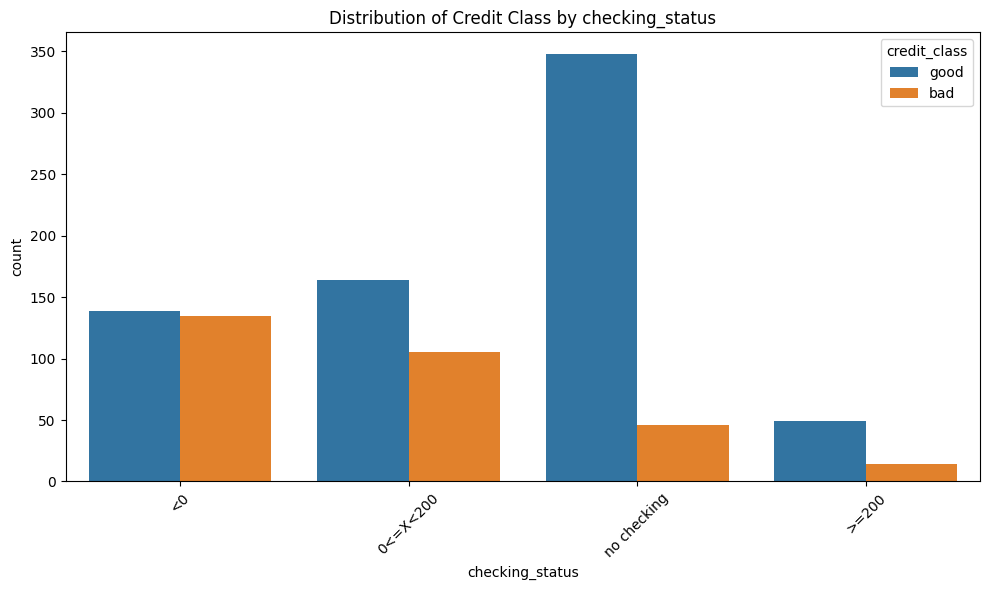

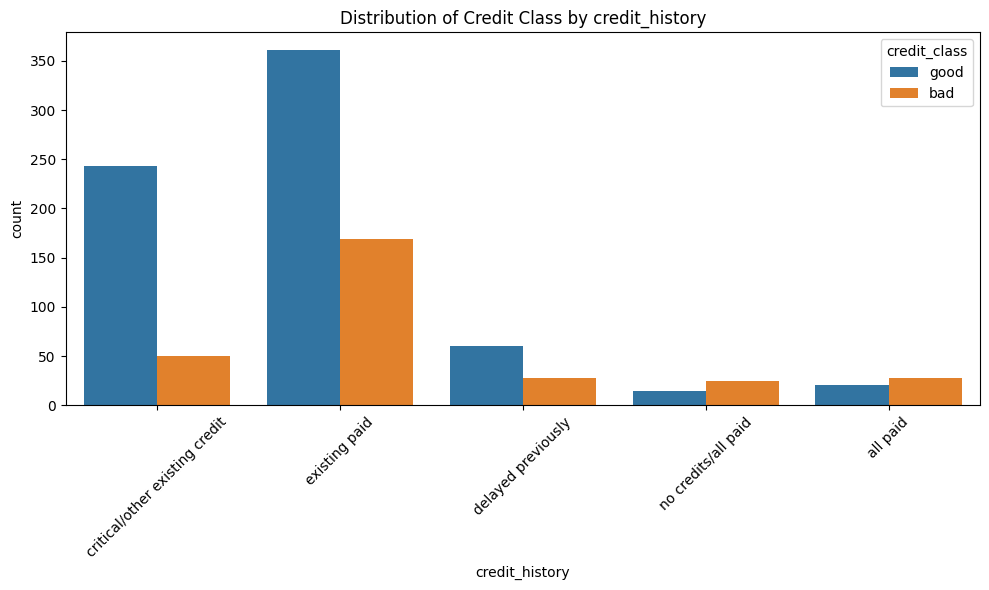

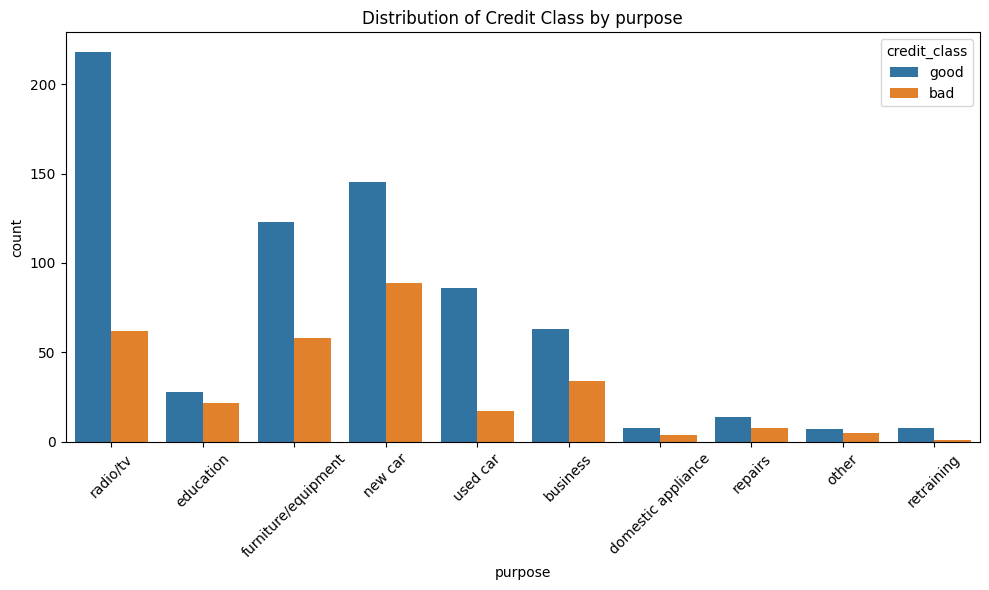

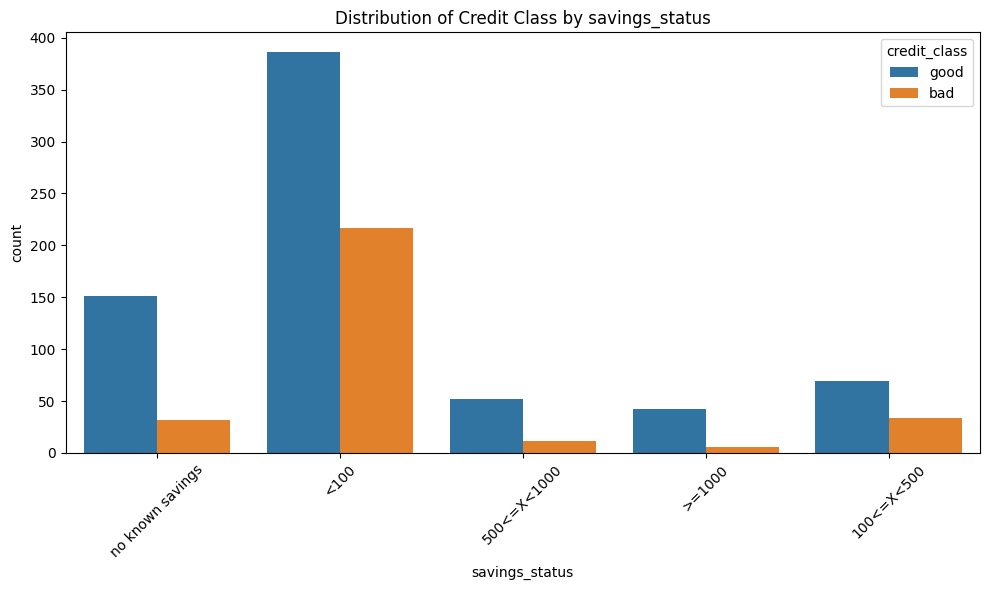

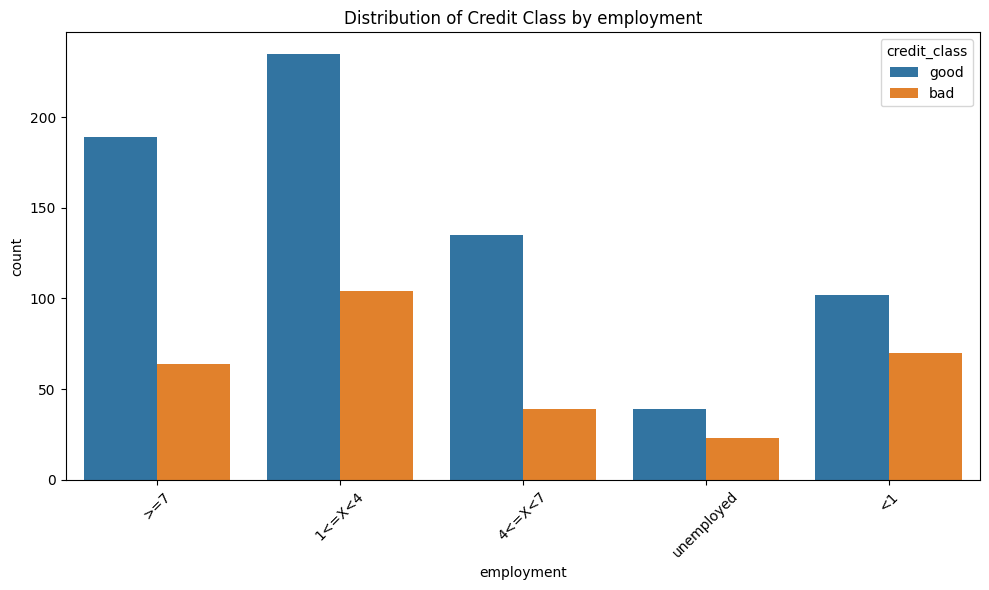

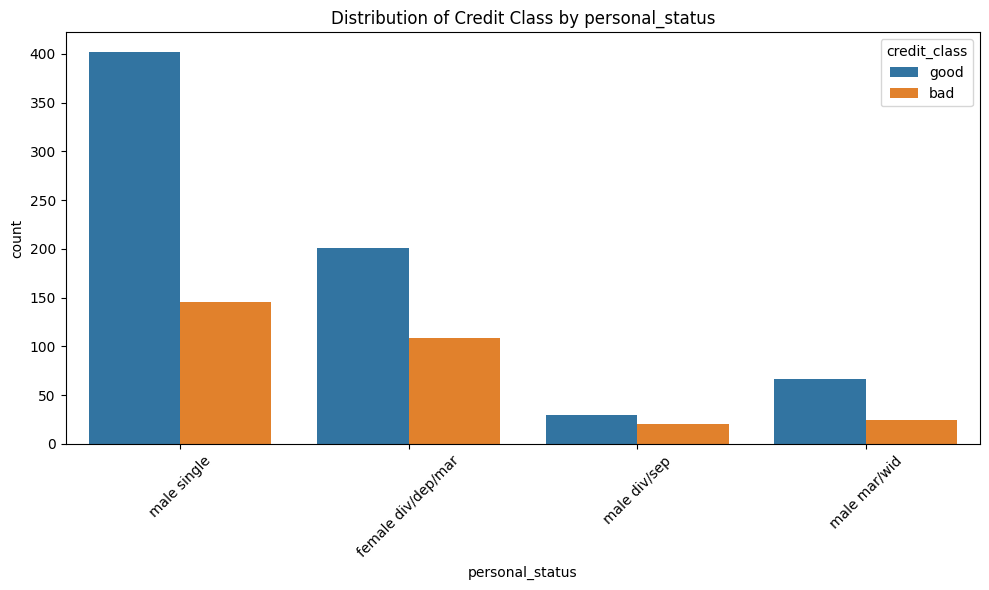

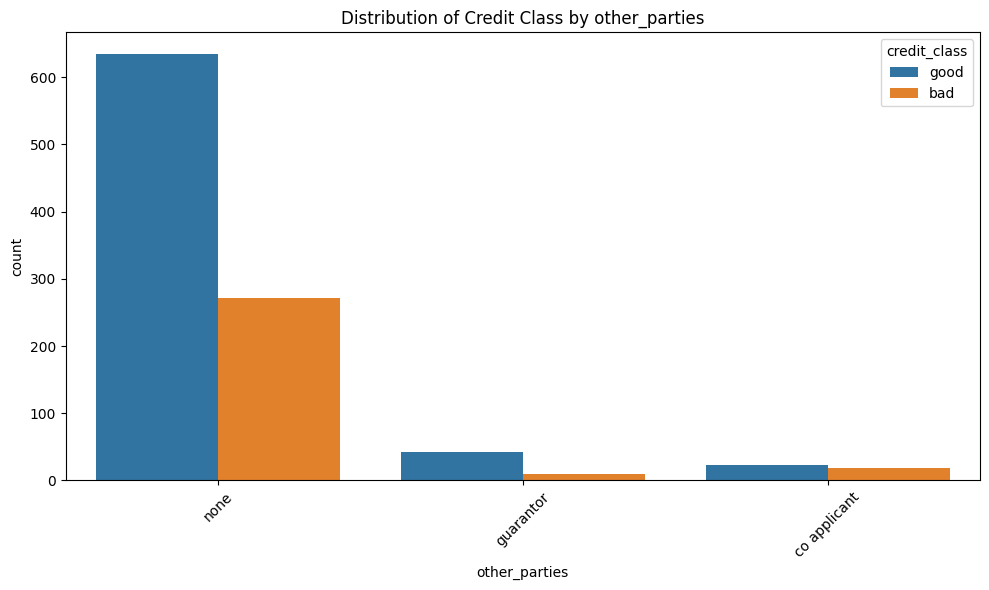

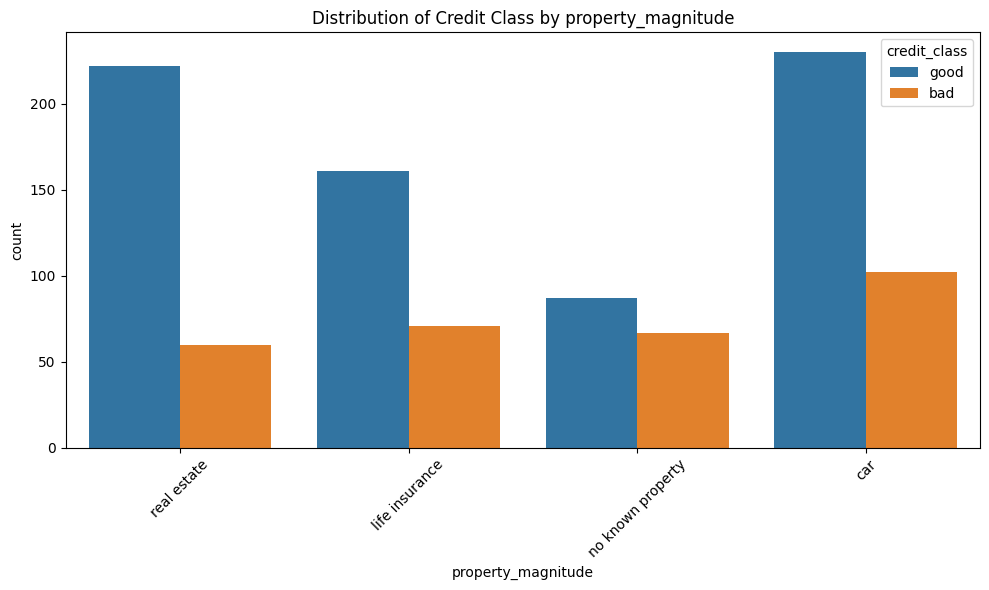

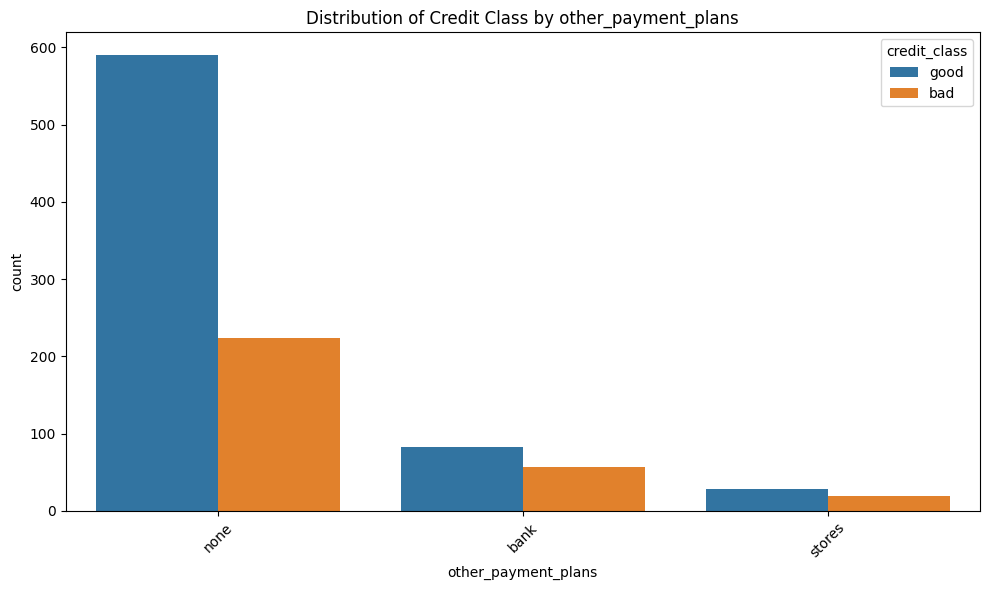

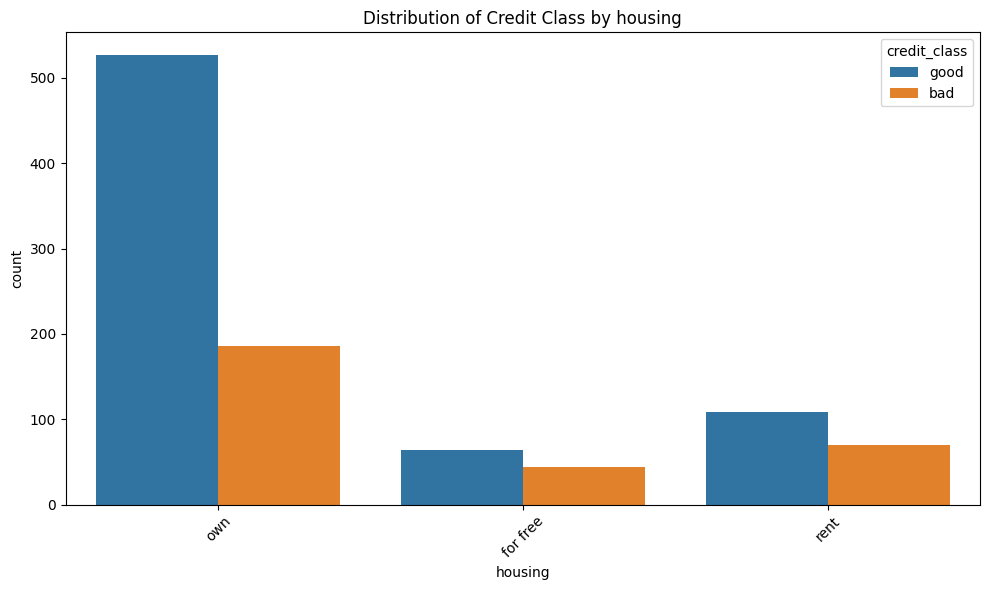

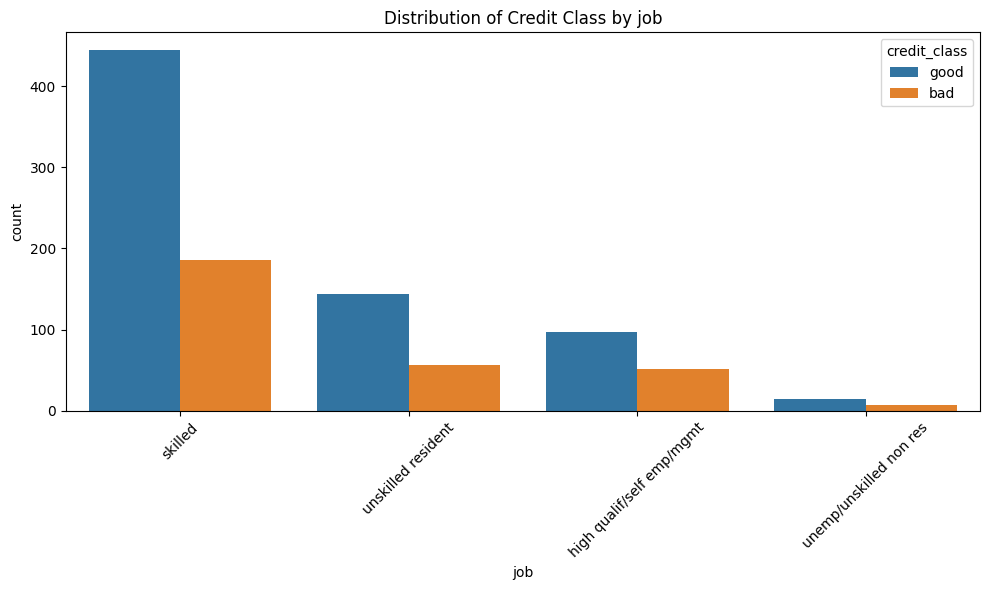

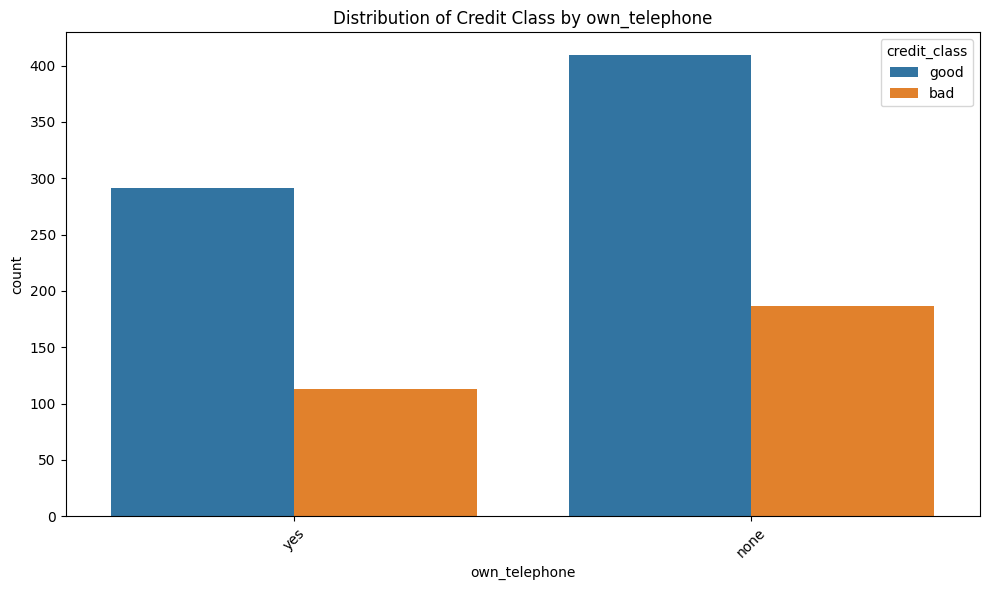

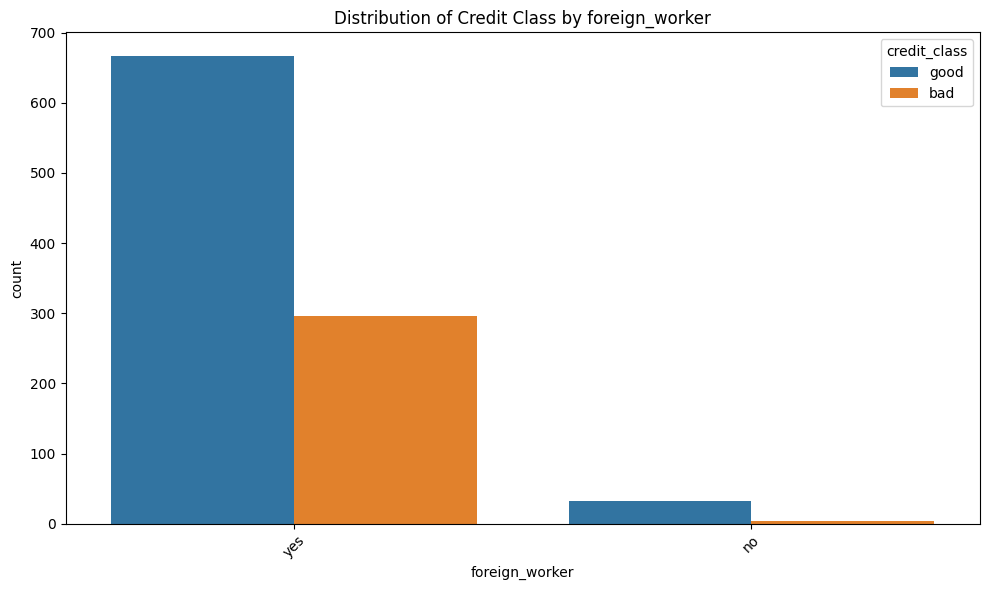

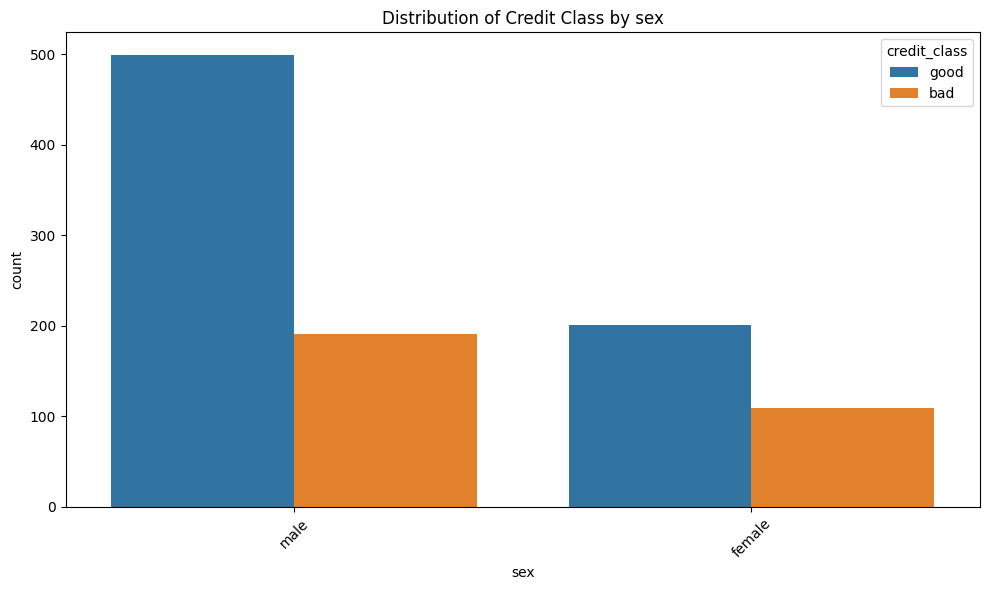

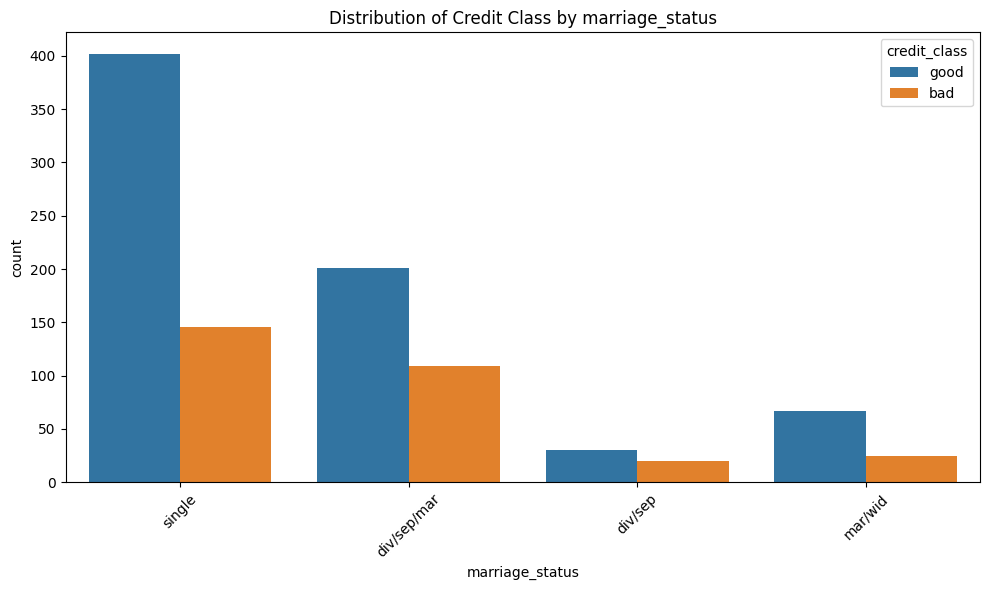

In [16]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # Adjust as necessary

for col in categorical_columns:
    if col != 'credit_class':  # Assuming 'credit_class' is also a categorical column
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='credit_class', data=df)
        plt.title(f'Distribution of Credit Class by {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()